# Unit 4 Project - Model Building 

# Part 1 - Learn Linear Regression Theory

### Step 1: Describe Linear Regression Models 

Answer the following questions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- In your own words, briefly describe a simple linear regression model.
> It is a regression model that estimates the relationship between two quatitative variables using a straight line.
- What type of machine learning is linear regression?
> It is a supervised machine learning model
- What is a “line of best fit” using the OLS method?
> The line is sometimes called the "line of best fit" because it is the line that fits best when drawn through the points.
- What is the difference between correlation and regression?
> The regression has a cause and effect and with coorelation it is two things that move together so it is a point on a graph.
- Describe a scenario when you would use linear regression and why you would use it. 
> To check if the higher SAT score the higher a GPA


### Step 2: Describe Linear Regression Assumptions 

In your own words, describe the following linear regression assumptions after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Linearity
> The specified model must represent a linear relationship
- Normality
> We can assume normality as a given
- Homoscedasticity
> To have equal variance
- No multicollinearity
> No predictor variable should be perfectly (or almost perfectly) explained by the other predictors.
- No endogeneity
> The independent variables shouldn’t be correlated with the error term
- No autocorrelation
> No identifiable relationship should exist between the values of the error term.

### Step 3: Describe How to Interpret Results from Correlation Table in Model Summary 

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- Coefficient of Constant / Intercept (b0)
> The estimated constant b0 is the Y-intercept of the regression line (usually just called "the intercept" or "the constant"), which is the value that would be predicted for Y at X = 0.
- Coefficient of Independent Variable (B1)
> The estimated coefficient b1 is the slope of the regression line, or the predicted change in Y based on change in X
- Standard Error
> It represents the accuracy of prediction for each variable. The lower the standard error the btter the estimate.
- T-Statistic
> The calculated difference represented in units of standard error. The greater the magnitude of T, the greater the evidence against the null hypothesis.
- P-Value of T-Statistic (from the independent variable)
> A p-value is a statistical measurement used to validate a hypothesis against observed data.
it measures the probability of obtaining the observed results, assuming that the null hypothesis is true.
The lower the p-value, the greater the statistical significance of the observed difference.
A p-value of 0.05 or lower is generally considered statistically significant.

### Step 4:  Explain R-Squared and adjusted R-squared

In your own words, describe the following terms after reading the resource material and watching the video lectures linked in the Linear Regression Theory section:

- R-squared
 It's a measure of how well your model fits your data
- Adjusted R-squared


# Part 2 - Linear Regression in Practice

### Step 1: Import libraries and load dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

sns.set()

In [29]:
df = pd.read_csv('house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  2014-10-13  221900.0         3       1.00         1180   
1      6414100192  2014-12-09  538000.0         3       2.25         2570   
2      5631500400  2015-02-25  180000.0         2       1.00          770   
3      2487200875  2014-12-09  604000.0         4       3.00         1960   
4      1954400510  2015-02-18  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
20451  2997800021  2015-02-19  475000.0         3       2.50         1310   
20452   263000018  2014-05-21  360000.0         3       2.50         1530   
20453  6600060120  2015-02-23  400000.0         4       2.50         2310   
20454   291310100  2015-01-16  400000.0         3       2.50         1600   
20455  1523300157  2014-10-15  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  house_condition  grade  sqft_above  \
0        5650.0     1.0           0     1                3    7.0      1180.0   
1        7242.0     2.0           0     1                3    7.0      2170.0   
2       10000.0     1.0           0     1                3    6.0       770.0   
3        5000.0     1.0           0     1                5    7.0      1050.0   
4        8080.0     1.0           0     1                3    8.0      1680.0   
...         ...     ...         ...   ...              ...    ...         ...   
20451    1294.0     2.0           0     1                3    8.0      1180.0   
20452    1131.0     3.0           0     1                3    8.0      1530.0   
20453    5813.0     2.0           0     1                3    8.0      2310.0   
20454    2388.0     2.0           0     1                3    8.0      1600.0   
20455    1076.0     2.0           0     1                3    7.0      1020.0   

       sqft_basement  year_built  zipcode      lat     long  sqft_living_15  
0                  0      1955.0  98178.0  47.5112 -122.257            1340  
1                400      1951.0  98125.0  47.7210 -122.319            1690  
2                  0      1933.0  98028.0  47.7379 -122.233            2720  
3                910      1965.0  98136.0  47.5208 -122.393            1360  
4                  0      1987.0  98074.0  47.6168 -122.045            1800  
...              ...         ...      ...      ...      ...             ...  
20451            130      2008.0  98116.0  47.5773 -122.409            1330  
20452              0      2009.0  98103.0  47.6993 -122.346            1530  
20453              0      2014.0  98146.0  47.5107 -122.362            1830  
20454              0      2004.0  98027.0  47.5345 -122.069            1410  
20455              0      2008.0  98144.0  47.5941 -122.299            1020  

[20456 rows x 19 columns]

### Step 2: Explore the data 

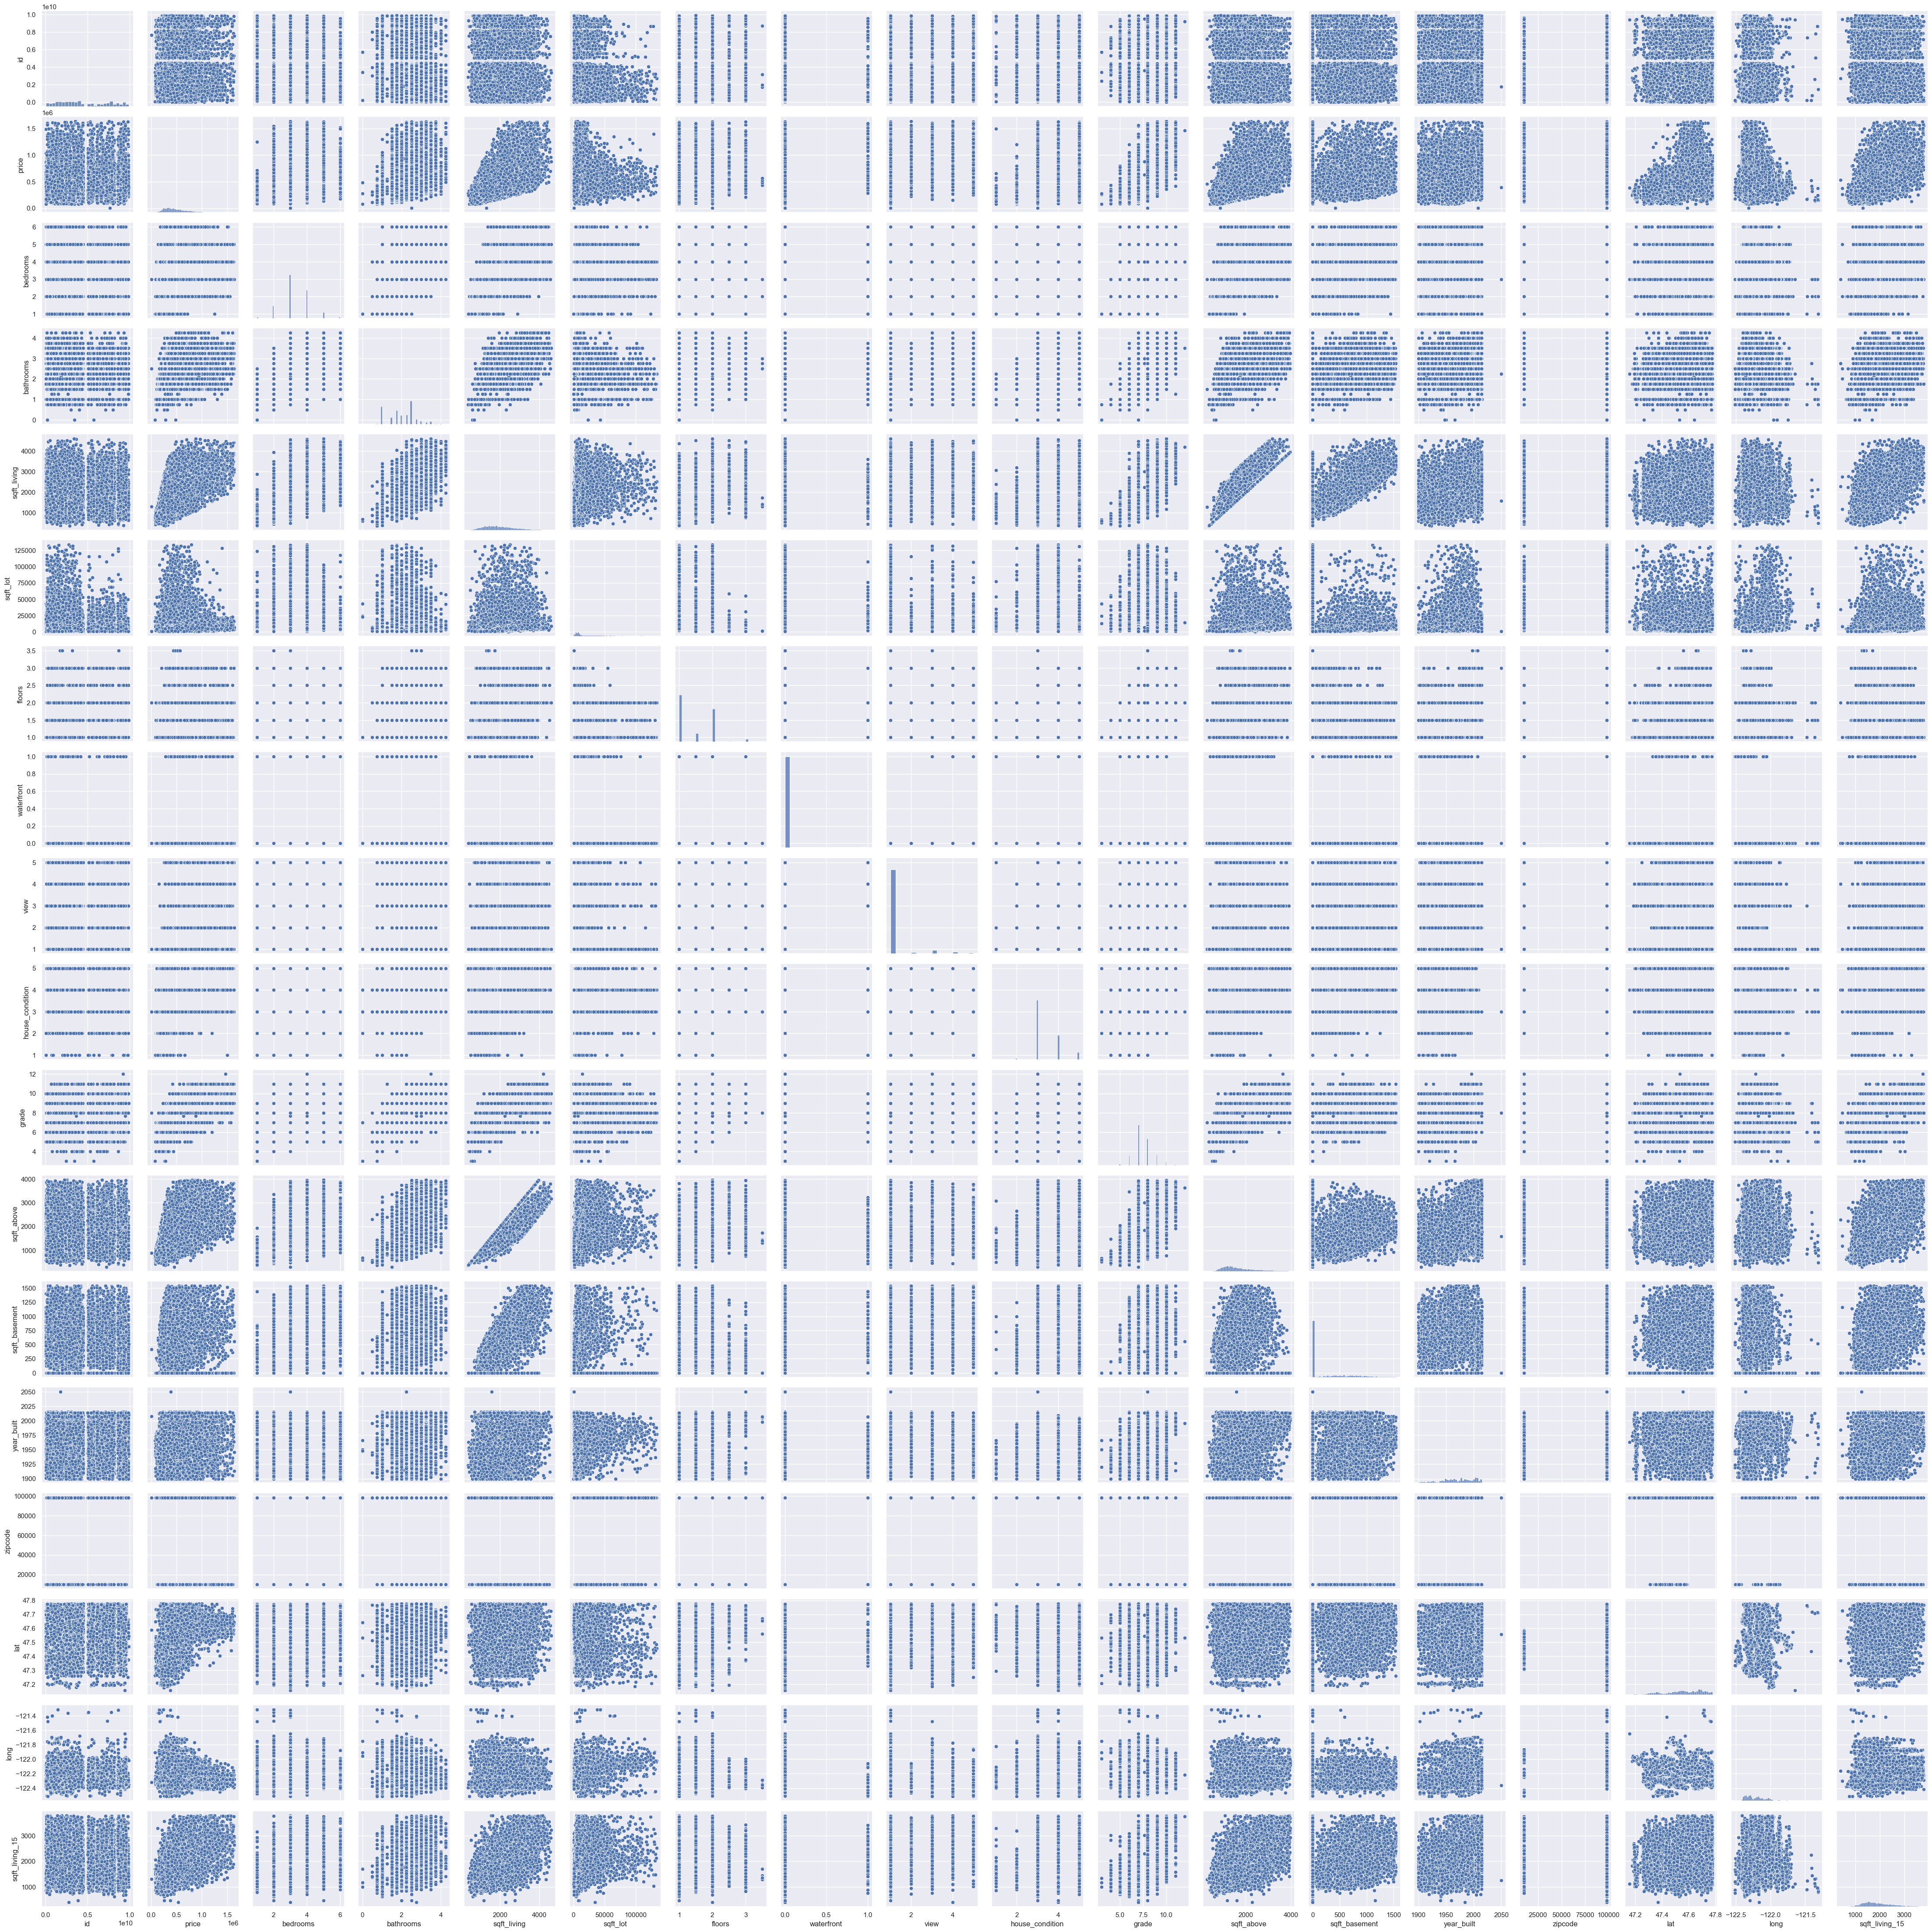

In [3]:
# looking at initial pairplot

sns.pairplot(df);

#### As you can see above, if I try to use a pairplot for the entire dataframe, there will likely be too many columns/variables to be useful. First I will reduce my dataframe down to variables I am interested in potentially using in the linear regression. 

### This is solution notebook is only an example. Student answers are expected to vary.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20456 entries, 0 to 20455
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20456 non-null  int64  
 1   date             20456 non-null  object 
 2   price            20456 non-null  float64
 3   bedrooms         20456 non-null  int64  
 4   bathrooms        20456 non-null  float64
 5   sqft_living      20456 non-null  int64  
 6   sqft_lot         20456 non-null  float64
 7   floors           20456 non-null  float64
 8   waterfront       20456 non-null  int64  
 9   view             20456 non-null  int64  
 10  house_condition  20456 non-null  int64  
 11  grade            20456 non-null  float64
 12  sqft_above       20456 non-null  float64
 13  sqft_basement    20456 non-null  int64  
 14  year_built       20456 non-null  float64
 15  zipcode          20452 non-null  float64
 16  lat              20456 non-null  float64
 17  long        

In [30]:
df = df[['price', 'sqft_living', 'sqft_lot', 'year_built', 'house_condition', 'grade', 'view']].copy()

In [31]:
df.describe()

price   sqft_living       sqft_lot    year_built  \
count  2.045600e+04  20456.000000   20456.000000  20456.000000   
mean   4.863355e+05   1942.120258   10302.509875   1969.985041   
std    2.398423e+05    724.345438   12700.282036     29.355600   
min    3.209000e+03    370.000000     520.000000   1900.000000   
25%    3.120000e+05   1390.000000    5000.000000   1950.750000   
50%    4.350000e+05   1840.000000    7412.000000   1972.000000   
75%    6.020000e+05   2410.000000   10022.250000   1995.000000   
max    1.640000e+06   4600.000000  133729.000000   2050.000000   

       house_condition         grade          view  
count     20456.000000  20456.000000  20456.000000  
mean          3.411322      7.514241      1.179165  
std           0.652286      1.026879      0.661116  
min           1.000000      3.000000      1.000000  
25%           3.000000      7.000000      1.000000  
50%           3.000000      7.000000      1.000000  
75%           4.000000      8.000000      1.000000  
max           5.000000     12.000000      5.000000

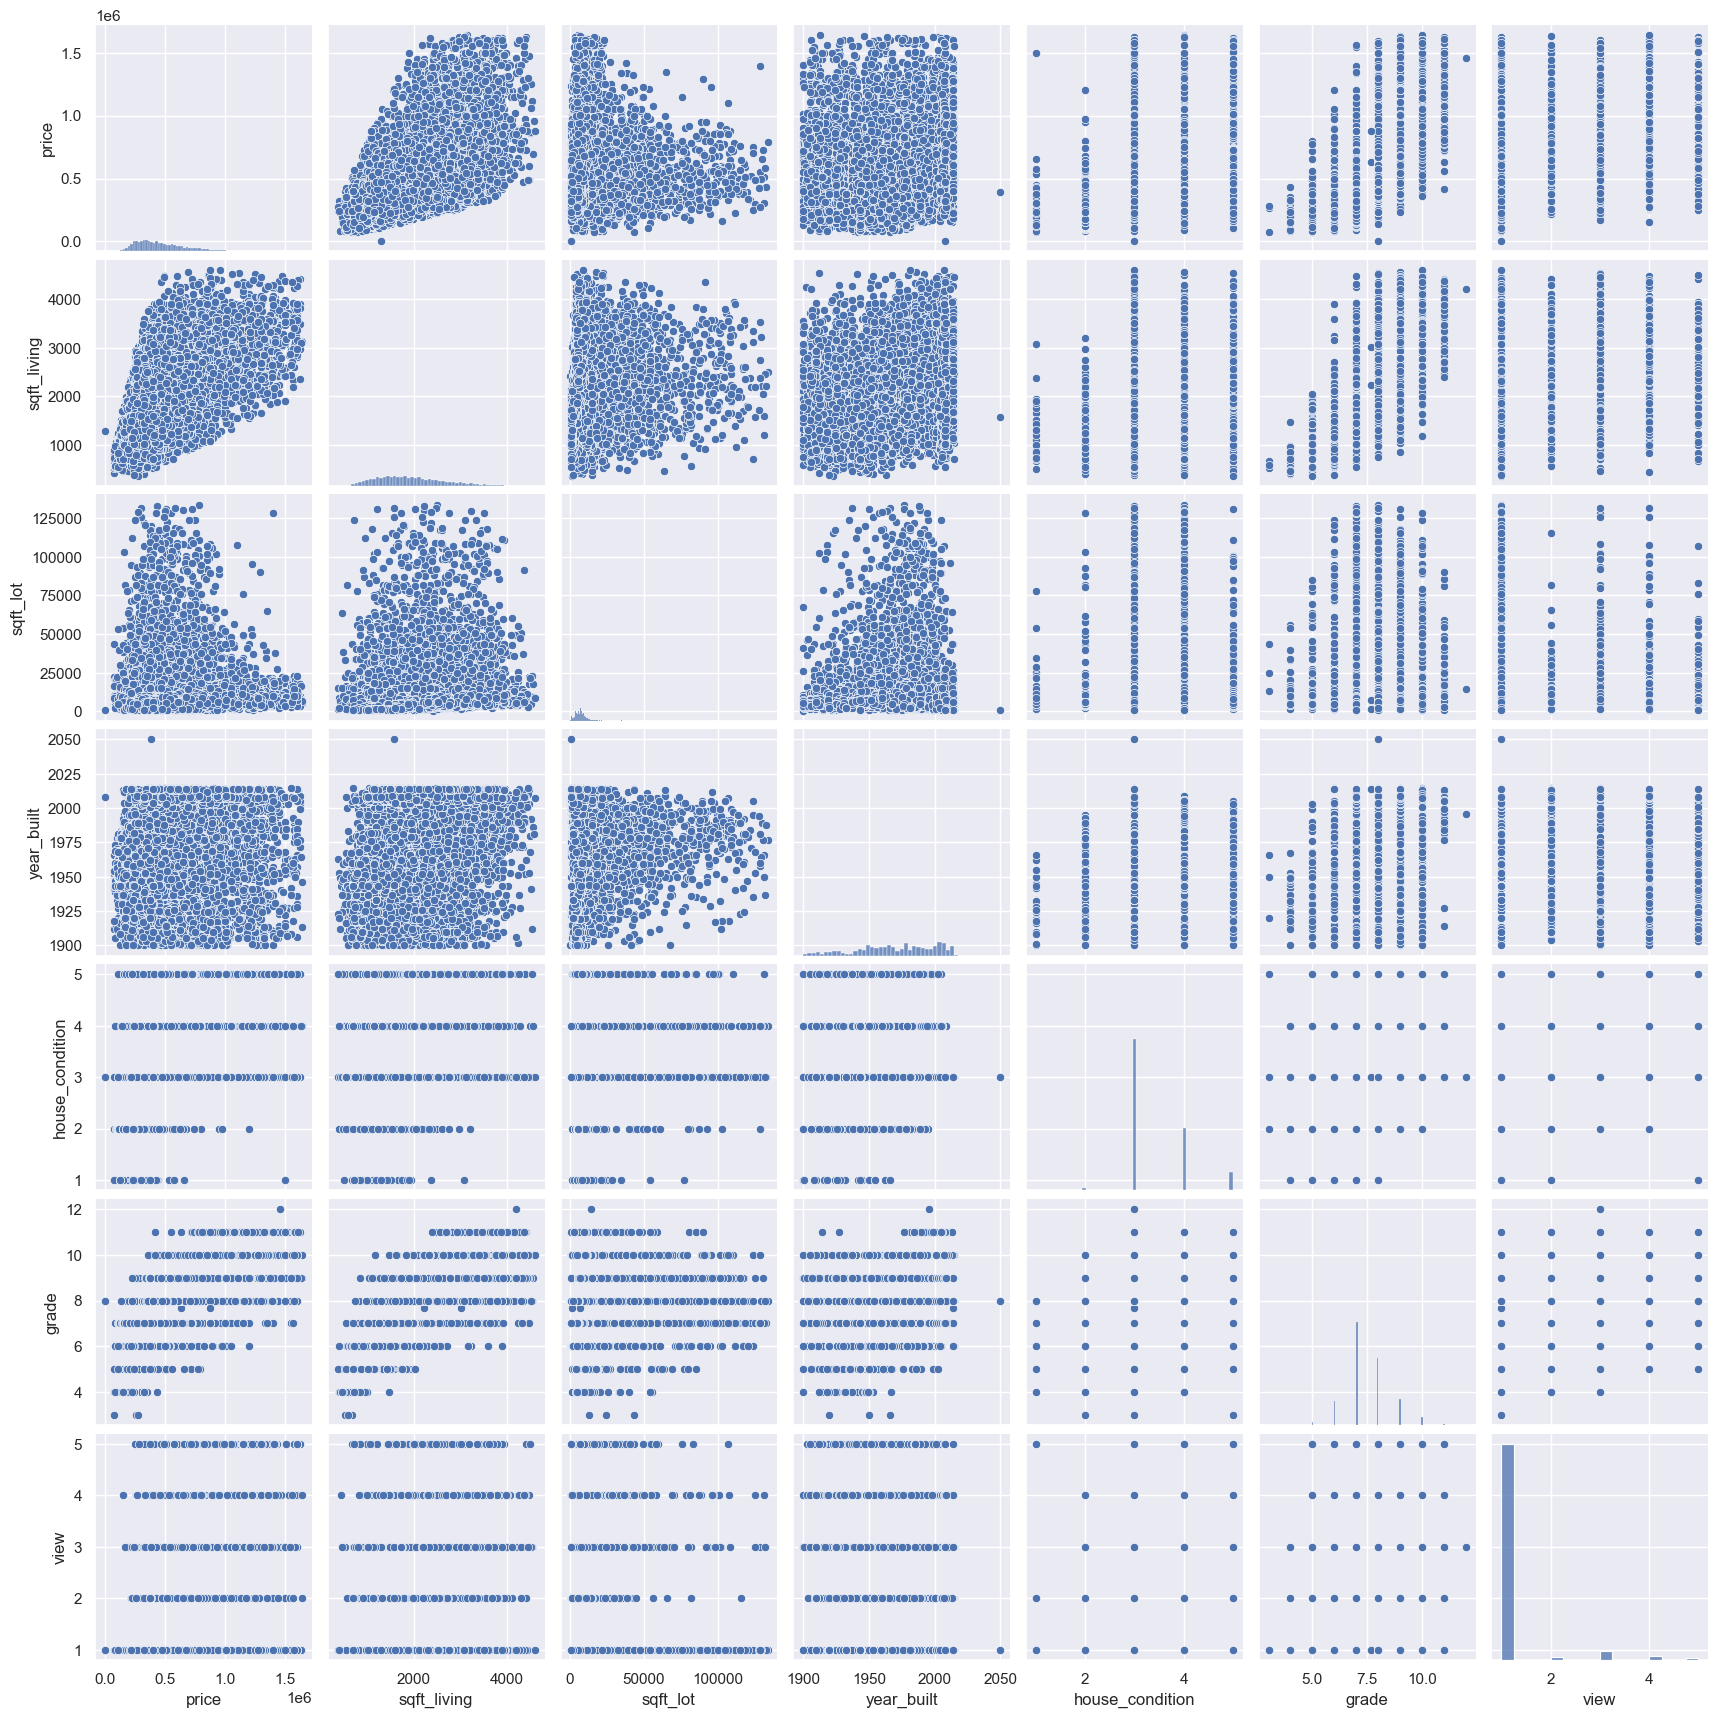

In [32]:
sns.pairplot(df);

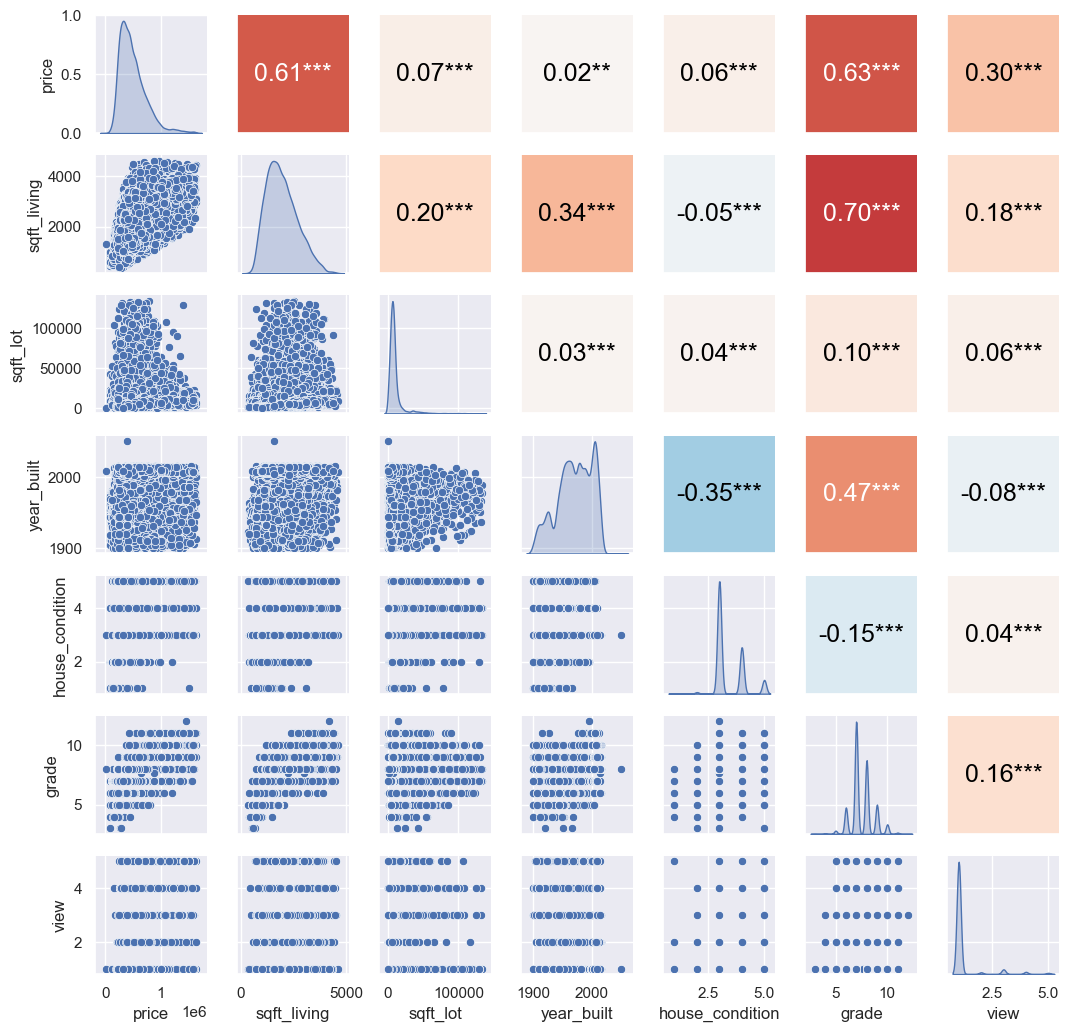

In [33]:
# imports pearsonr function to find correlations and pvalues
from scipy.stats import pearsonr

# creates function which rates pvalues on a 3-1 star basis with 3 ***'s being the most statistically significant
def corrfunc(x, y, **kwargs):
    def pvalue_stars(p):
        if 0.05 >= p > 0.01:
            return '*'
        elif 0.01 >= p > 0.001:
            return '**'
        elif p <= 0.001:
            return '***'
        else:
            return ''
    cmap = kwargs['cmap']
    norm = kwargs['norm']
    ax = plt.gca()
    ax.grid(False)
    r, p = pearsonr(x, y)
    facecolor = cmap(norm(r))
    ax.set_facecolor(facecolor)
    lightness = (max(facecolor[:3]) + min(facecolor[:3])) / 2
    ax.annotate(f"{r:.2f}{pvalue_stars(p)}", xy=(.5, .5), xycoords=ax,
                color='white' if lightness < 0.7 else 'black',
                size=18, ha='center', va='center')

# pairgrid w/ half pair plot, histograms down diagonal, correlation heatmap, & pvalue's represented by *'s

g = sns.PairGrid(df, height=1.5, diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot, shade=True)
g.map_upper(corrfunc,
            cmap=plt.get_cmap('RdBu_r'), 
            norm=plt.Normalize(vmin=-1, vmax=1))
g.add_legend()
plt.show()

#### Based on the output above, I see the strongest correlations with price (in order descending) are:
- price and grade (0.63 correlation with below 0.001 p-value)
- price and square feet (0.61 correlation with below 0.001 p-value)
- price and view (0.30 correlation coefficient with below .001 p-value)

### Step 3: Determine independent and dependent variable

I'll be using price as the dependent variable (predicted value) and square feet living area as the independent variable (predict-ING value). 

In [34]:
# sets X to sqft_living

x1 = df['sqft_living']

# sets Y to price

y = df['price']


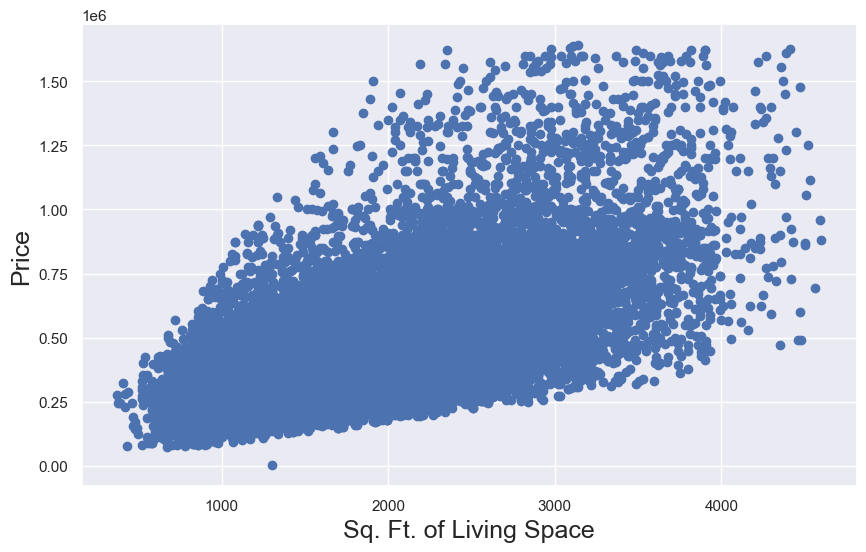

In [35]:
# visualizing relationship between price and sqft living space

plt.figure(figsize=(10,6))
plt.scatter(x1, y)
plt.xlabel('Sq. Ft. of Living Space', fontsize=18)
plt.ylabel('Price', fontsize=18);

### Step 4: Fit Regression 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model and which statistical package is used for linear regression model.

In [15]:
x = sm.add_constant(x1)

In [16]:
results = sm.OLS(y,x).fit()

In [17]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                 1.231e+04
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:52:55   Log-Likelihood:            -2.7761e+05
No. Observations:               20456   AIC:                         5.552e+05
Df Residuals:                   20454   BIC:                         5.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        9.213e+04   3791.541     24.298      0.000    8.47e+04    9.96e+04
sqft_living   202.9775      1.829    110.966      0.000     199.392     206.563
==============================================================================
Omnibus:                     3900.816   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9054.676
Skew:                           1.084   Prob(JB):                         0.00
Kurtosis:                       5.434   Cond. No.                     5.93e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 5: Interpret Model Summary 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

- R-squared 
- Coefficient of independent variable
- P-value of T-statistic
- P-value of F-statistic

(solutions for the above bullet points will depend on what student chose as independent variable)

### Step 6: Predict Values

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [18]:
# creating new mock data to feed into linear model to predict price based on sqft_living 

new_df = pd.DataFrame({'constant':1, 'sqft_living':[1100, 1500]})
new_df

constant  sqft_living
0         1         1100
1         1         1500

In [19]:
# using .predict() with new values to predict price

predictions = results.predict(new_df)
predictions

0    315404.008401
1    396595.022459
dtype: float64

In [20]:
# creating prediction column to see price prediction in dataframe with the new sqft_living values

new_df['price_predictions'] = results.predict(new_df)
new_df

constant  sqft_living  price_predictions
0         1         1100      315404.008401
1         1         1500      396595.022459

# Part 3 - Multiple Linear Regression

### Step 1: From Data Exploration in Part 2, Pick Another Independent Variable 

Looking back at the PairGrid I made from the dataframe, I will use the grade variable to add to the linear regression. It is important here to pick something that is not highly correlated with sqft_living or I would be violating the assumption of no multicollinearity. 

### Step 2: Fit A New Multiple Linear Regression Model to the New Independent Variables

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

In [36]:
y = df['price']
x1 = df[['sqft_living', 'grade']]

In [37]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     8419.
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:00:15   Log-Likelihood:            -2.7629e+05
No. Observations:               20456   AIC:                         5.526e+05
Df Residuals:                   20453   BIC:                         5.526e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.116e+05   1.01e+04    -40.665      0.000   -4.31e+05   -3.92e+05
sqft_living   113.2243      2.407     47.049      0.000     108.507     117.941
grade        9.023e+04   1697.513     53.153      0.000    8.69e+04    9.36e+04
==============================================================================
Omnibus:                     4053.224   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9767.719
Skew:                           1.109   Prob(JB):                         0.00
Kurtosis:                       5.558   Cond. No.                     1.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 3: Interpret Model Summary 

Solution below is for example only. Results may vary depending on variables chosen by student to use in linear regression model. 

Print the output of the results summary from your model. Interpret the following parts of your results summary. Include an explanation of what the given numbers mean in regards to your model.
- R-squared 
- Adjusted R-squared
- Coefficient of independent variables
- P-value of T-statistic
- P-value of F-statistic

(solutions for the above bullet points will depend on what student chose as independent variable)

If you would like, continue to create new linear models as you add more than two independent variables. Notice the differences in the R-Squared values you get from each model. 

### Bonus: Additional Mulitlinear Regression Model with 3 Independent Variables

In [38]:
y = df['price']
x1 = df[['sqft_living', 'grade', 'view']]

In [39]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     6364.
Date:                Mon, 05 Sep 2022   Prob (F-statistic):               0.00
Time:                        15:10:59   Log-Likelihood:            -2.7569e+05
No. Observations:               20456   AIC:                         5.514e+05
Df Residuals:                   20452   BIC:                         5.514e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.518e+05   9894.481    -45.657      0.000   -4.71e+05   -4.32e+05
sqft_living   105.4301      2.347     44.913      0.000     100.829     110.031
grade        8.735e+04   1650.493     52.923      0.000    8.41e+04    9.06e+04
view         6.528e+04   1856.542     35.162      0.000    6.16e+04    6.89e+04
==============================================================================
Omnibus:                     3666.341   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             8679.921
Skew:                           1.016   Prob(JB):                         0.00
Kurtosis:                       5.460   Cond. No.                     1.72e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.72e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Step 4: Predict Values

In [57]:
# creating new dataframe with independent variable values to feed into model for price prediction

new_df = pd.DataFrame({'constant':1, 'sqft_living':[1200, 1200, 1200, 1200], 'grade':[6,6,8,8], 'view':[0,1,0,1]})
new_df

constant  sqft_living  grade  view
0         1         1200      6     0
1         1         1200      6     1
2         1         1200      8     0
3         1         1200      8     1

In [58]:
# adds new column of price predictions based on independent variable values in model

new_df['price_predictions'] = results.predict(new_df)
new_df

constant  sqft_living  grade  view  price_predictions
0         1         1200      6     0      198851.018479
1         1         1200      6     1      264131.434898
2         1         1200      8     0      373547.513197
3         1         1200      8     1      438827.929616

In [61]:
# adding comments of conditions for learning purposes only - 
# notice how the price differs based on the factors in the comments

new_df['comments'] = ['lower grade, NO view', 'lower grade, WITH view', 'higher grade, NO view', 'higher grade, WITH view']
new_df

constant  sqft_living  grade  view  price_predictions  \
0         1         1200      6     0      198851.018479   
1         1         1200      6     1      264131.434898   
2         1         1200      8     0      373547.513197   
3         1         1200      8     1      438827.929616   

                  comments  
0     lower grade, NO view  
1   lower grade, WITH view  
2    higher grade, NO view  
3  higher grade, WITH view

### Step 5: Report Observations in Difference Between Simple and Multiple Linear Regression Models You Made 

In this example solution, the simple linear regression using only square footage of the living area only had an R-squared value of 0.376. By adding grade, the adjusted R-squared went up to 0.452. By adding view on top of that, the adjusted R-squred went up to 0.483. 

# Part 4 - Multivariate Time Series Analysis

#### Solution is found separately in the data-time-series-solution folder.

# Part 5 - Submit Project 